<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Model/09-28-xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('credit_cards_dataset.csv')

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Target Variable(목표변수) : default.payment.next.month

Input Variable(독립변수): 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'

In [4]:
X = df.drop(['ID','default.payment.next.month'], axis=1).values

In [5]:
type(X)

numpy.ndarray

In [6]:
X.shape

(30000, 23)

In [7]:
Y = df['default.payment.next.month'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=123435)

In [10]:
X_train.shape

(21000, 23)

In [11]:
import xgboost as xgb

In [12]:
dtrain = xgb.DMatrix(X_train, label=Y_train)

In [13]:
dtest = xgb.DMatrix(X_test, label=Y_test)

Hyper - Parameter setting

In [14]:
param = {'max_depth': 5, 'eta': 0.01, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [15]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [16]:
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.763584	train-auc:0.762042
[1]	eval-auc:0.763552	train-auc:0.762026
[2]	eval-auc:0.763628	train-auc:0.76202
[3]	eval-auc:0.763846	train-auc:0.762104
[4]	eval-auc:0.763926	train-auc:0.762128
[5]	eval-auc:0.763973	train-auc:0.762182
[6]	eval-auc:0.764006	train-auc:0.762587
[7]	eval-auc:0.77	train-auc:0.768614
[8]	eval-auc:0.769982	train-auc:0.768589
[9]	eval-auc:0.770119	train-auc:0.768691
[10]	eval-auc:0.770157	train-auc:0.768872
[11]	eval-auc:0.770549	train-auc:0.769367
[12]	eval-auc:0.770479	train-auc:0.769501
[13]	eval-auc:0.770572	train-auc:0.769386
[14]	eval-auc:0.772501	train-auc:0.770606
[15]	eval-auc:0.772603	train-auc:0.770635
[16]	eval-auc:0.772686	train-auc:0.77065
[17]	eval-auc:0.772562	train-auc:0.770642
[18]	eval-auc:0.772598	train-auc:0.770713
[19]	eval-auc:0.772586	train-auc:0.77067
[20]	eval-auc:0.772578	train-auc:0.770714
[21]	eval-auc:0.772598	train-auc:0.770761
[22]	eval-auc:0.772582	train-auc:0.770784
[23]	eval-auc:0.772661	train-auc:0.770869
[24]	eval

In [17]:
ypred = bst.predict(dtest)

In [18]:
type(ypred)

numpy.ndarray

In [19]:
ypred[:30]

array([0.23417206, 0.24706452, 0.24706452, 0.27013406, 0.41221747,
       0.2519243 , 0.2420104 , 0.2682993 , 0.31672642, 0.2345034 ,
       0.3022913 , 0.24706452, 0.23417206, 0.2345034 , 0.265465  ,
       0.334935  , 0.23417206, 0.331391  , 0.23993142, 0.2909264 ,
       0.24706452, 0.28592768, 0.70638686, 0.44852236, 0.2689549 ,
       0.24431972, 0.36255962, 0.6769386 , 0.41472042, 0.23417206],
      dtype=float32)

In [20]:
import numpy as np

In [21]:
predictive_values = np.rint(ypred)

In [22]:
predictive_values[:30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

accuracy = accuracy_score(Y_test, predictive_values)
cm = confusion_matrix(Y_test, predictive_values)
precision = precision_score(Y_test, predictive_values)
recall = recall_score(Y_test, predictive_values)

In [24]:
print(accuracy)
print(cm)
print(precision)
print(recall)

0.8192222222222222
[[6669  315]
 [1312  704]]
0.6908734052993131
0.3492063492063492


In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6669  315]
 [1312  704]]


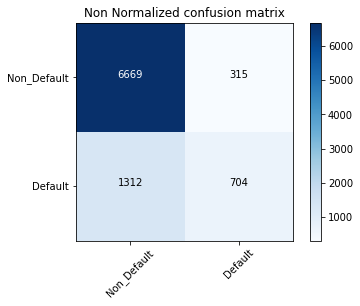

In [26]:
plt.figure()
plot_confusion_matrix(cm, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

In [27]:
import matplotlib.pyplot as plt

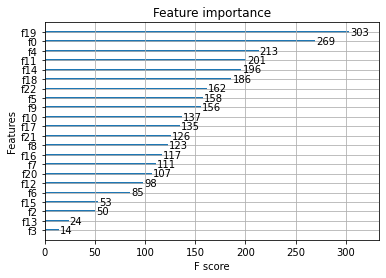

In [28]:
xgb.plot_importance(bst)

In [29]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')